# Model `GreConD` and `GreConDPlus`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 30
[I] n            : 50
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


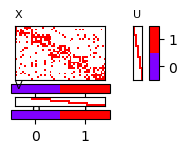

<Figure size 640x480 with 0 Axes>

In [2]:
# from generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=10, n=10, k=5, overlap=[0.1, 0.1])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix()

from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=30, n=50, k=5, overlap=[0.1, 0.1])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix()

In [3]:
X = data.X
from utils import multiply
from scipy.sparse import lil_matrix
# multiply(X.sum(axis=1)>0, X[0, :] == 0)
Y = lil_matrix(X)
Z = lil_matrix(Y.copy())
Y[0, 0] = 2
Z[0, 0]

1

In [4]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [5]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718165595
[I]   train_size   : 337
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718165595


In [6]:
from utils import to_dense

to_dense(lil_matrix([[1]]), squeeze=True).astype(bool)

array(True)

In [8]:
from models import GreConD
import warnings

min_support = 0.2

model = GreConD()
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

[I] k            : None
[I] tol          : 0
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


d:\Dropbox\PyBMF\examples\..\models\GreConD.py:90: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  j_list = [j for j in j_rs if best_v[j] == 0]
d:\Dropbox\PyBMF\examples\..\models\GreConD.py:90: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  j_list = [j for j in j_rs if best_v[j] == 0]
d:\Dropbox\PyBMF\examples\..\models\GreConD.py:90: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  j_list = [j for j in j_rs if best_v[j] == 0]
d:\Dropbox\PyBMF\examples\..\models\GreConD.py:90: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  j_list = [j for j in j_rs if best_v[j] == 0]
d:\Dropbox\PyBMF\examples\..\models\GreConD.py:90: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  j_list = [j for j in j_rs if b

KeyboardInterrupt: 

In [6]:
# import pickle

# with open('hyper_model.pickle', 'wb') as handle:
#     pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('hyper_model.pickle', 'rb') as handle:
#     model = pickle.load(handle)

# `HyperPlus` for approximate decomposition

In [20]:
from models import HyperPlus
import warnings

import numpy as np
beta = np.inf
samples = 500
target_k = 1

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model_plus = HyperPlus(model=model, beta=beta, samples=samples, target_k=target_k)
model_plus.fit(X_train=X_train, task='reconstruction', verbose=False, display=True)

[I] model        : <models.GreConD.GreConD object at 0x00000268EA900C70>
[I] beta         : inf
[I] target_k     : 1
[I] samples      : 500
[I] verbose      : False
[I] display      : False


AssertionError: Please import a Hyper model.

In [8]:
model_plus.logs['refinements']

train  \
                                                                       0   
                 time   k   savings       FPR       FPB       OCR Recall   
0   06/06/24 02:41:15  56       inf  0.000000  0.000000  0.000000    1.0   
1   06/06/24 02:41:17  55  1.000000  0.000860  0.002967  0.002959    1.0   
2   06/06/24 02:41:18  54       inf  0.000860  0.002967  0.002959    1.0   
3   06/06/24 02:41:20  53  1.000000  0.001720  0.005935  0.005900    1.0   
4   06/06/24 02:41:21  52  1.500000  0.003439  0.011869  0.011730    1.0   
5   06/06/24 02:41:22  51  1.333333  0.006019  0.020772  0.020349    1.0   
6   06/06/24 02:41:24  50  1.000000  0.009458  0.032641  0.031609    1.0   
7   06/06/24 02:41:25  49  1.250000  0.012898  0.044510  0.042614    1.0   
8   06/06/24 02:41:26  48  0.800000  0.017197  0.059347  0.056022    1.0   
9   06/06/24 02:41:27  47  0.800000  0.021496  0.074184  0.069061    1.0   
10  06/06/24 02:41:29  46  1.000000  0.024076  0.083086  0.076712    1.0   
11  06/06/24 02:41:30  45  1.000000  0.025795  0.089021  0.081744    1.0   
12  06/06/24 02:41:31  44  0.833333  0.030954  0.106825  0.096515    1.0   
13  06/06/24 02:41:33  43  0.800000  0.035254  0.121662  0.108466    1.0   
14  06/06/24 02:41:34  42  0.666667  0.040413  0.139466  0.122396    1.0   
15  06/06/24 02:41:35  41  1.000000  0.042992  0.148368  0.129199    1.0   
16  06/06/24 02:41:36  40  0.750000  0.046432  0.160237  0.138107    1.0   
17  06/06/24 02:41:38  39  0.666667  0.051591  0.178042  0.151134    1.0   
18  06/06/24 02:41:39  38  0.666667  0.059329  0.204748  0.169951    1.0   
19  06/06/24 02:41:40  37  0.666667  0.061909  0.213650  0.176039    1.0   
20  06/06/24 02:41:41  36  0.666667  0.064488  0.222552  0.182039    1.0   
21  06/06/24 02:41:42  35  0.625000  0.071367  0.246291  0.197619    1.0   
22  06/06/24 02:41:44  34  0.666667  0.073947  0.255193  0.203310    1.0   
23  06/06/24 02:41:45  33  0.625000  0.080825  0.278932  0.218097    1.0   
24  06/06/24 02:41:46  32  0.600000  0.085125  0.293769  0.227064    1.0   
25  06/06/24 02:41:47  31  0.571429  0.091144  0.314540  0.239278    1.0   
26  06/06/24 02:41:49  30  0.571429  0.097163  0.335312  0.251111    1.0   
27  06/06/24 02:41:50  29  0.571429  0.103181  0.356083  0.262582    1.0   
28  06/06/24 02:41:51  28  0.500000  0.115219  0.397626  0.284501    1.0   
29  06/06/24 02:41:52  27  0.500000  0.118659  0.409496  0.290526    1.0   
30  06/06/24 02:41:53  26  0.500000  0.125537  0.433234  0.302277    1.0   
31  06/06/24 02:41:53  25  0.466667  0.138435  0.477745  0.323293    1.0   
32  06/06/24 02:41:54  24  0.416667  0.148753  0.513353  0.339216    1.0   
33  06/06/24 02:41:55  23  0.357143  0.160791  0.554896  0.356870    1.0   
34  06/06/24 02:41:55  22  0.333333  0.171109  0.590504  0.371269    1.0   
35  06/06/24 02:41:56  21  0.375000  0.177988  0.614243  0.380515    1.0   
36  06/06/24 02:41:56  20  0.333333  0.183147  0.632047  0.387273    1.0   
37  06/06/24 02:41:57  19  0.300000  0.191745  0.661721  0.398214    1.0   
38  06/06/24 02:41:57  18  0.285714  0.197764  0.682493  0.405644    1.0   
39  06/06/24 02:41:58  17  0.250000  0.201204  0.694362  0.409807    1.0   
40  06/06/24 02:41:58  16  0.243243  0.233018  0.804154  0.445724    1.0   
41  06/06/24 02:41:58  15  0.240000  0.254514  0.878338  0.467615    1.0   
42  06/06/24 02:41:59  14  0.230769  0.276870  0.955490  0.488619    1.0   
43  06/06/24 02:41:59  13  0.222222  0.292347  1.008902  0.502216    1.0   
44  06/06/24 02:41:59  12  0.200000  0.313844  1.083086  0.519943    1.0   
45  06/06/24 02:41:59  11  0.200000  0.356836  1.231454  0.551862    1.0   
46  06/06/24 02:42:00  10  0.229167  0.398108  1.373887  0.578750    1.0   
47  06/06/24 02:42:00   9  0.194444  0.429063  1.480712  0.596890    1.0   
48  06/06/24 02:42:00   8  0.159091  0.466896  1.611276  0.617045    1.0   
49  06/06/24 02:42:00   7  0.169811  0.512468  1.768546  0.638800    1.0   
50  06/06/24 02:42:00   6  0.140625  0.

In [9]:
# model_plus.logs['results'].to_pickle("./model_plus_results.pickle")
# model_plus.logs['refinements'].to_pickle("./model_plus_refinements.pickle")  

In [17]:
model_plus.logs['U']

[<30x56 sparse matrix of type '<class 'numpy.float64'>'
 	with 300 stored elements in List of Lists format>,
 <30x55 sparse matrix of type '<class 'numpy.float64'>'
 	with 297 stored elements in List of Lists format>,
 <30x54 sparse matrix of type '<class 'numpy.float64'>'
 	with 297 stored elements in List of Lists format>,
 <30x53 sparse matrix of type '<class 'numpy.float64'>'
 	with 296 stored elements in List of Lists format>,
 <30x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 291 stored elements in List of Lists format>,
 <30x51 sparse matrix of type '<class 'numpy.float64'>'
 	with 287 stored elements in List of Lists format>,
 <30x50 sparse matrix of type '<class 'numpy.float64'>'
 	with 284 stored elements in List of Lists format>,
 <30x49 sparse matrix of type '<class 'numpy.float64'>'
 	with 281 stored elements in List of Lists format>,
 <30x48 sparse matrix of type '<class 'numpy.float64'>'
 	with 277 stored elements in List of Lists format>,
 <30x47 sparse matr